In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [63]:
data = pd.read_csv('Dataset/dataset-uci.csv')

# EDA

In [64]:
data

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,1,49,0,0,0,0,0,0,178,88.8,...,55.0,81.0,28.0,50.0,90.0,0.98,94.50,6.2,16.5,8.3
315,1,31,1,0,0,0,0,0,157,53.4,...,58.0,64.0,24.0,16.0,38.0,0.50,128.50,0.0,12.5,24.0
316,1,58,0,0,0,0,0,0,172,96.6,...,45.0,168.0,21.0,27.0,94.0,1.04,83.23,0.0,15.4,15.7
317,1,37,1,0,0,0,0,0,177,88.4,...,33.0,253.0,40.0,22.0,115.0,1.01,98.23,0.4,16.0,33.3


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [66]:
data.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


<Axes: >

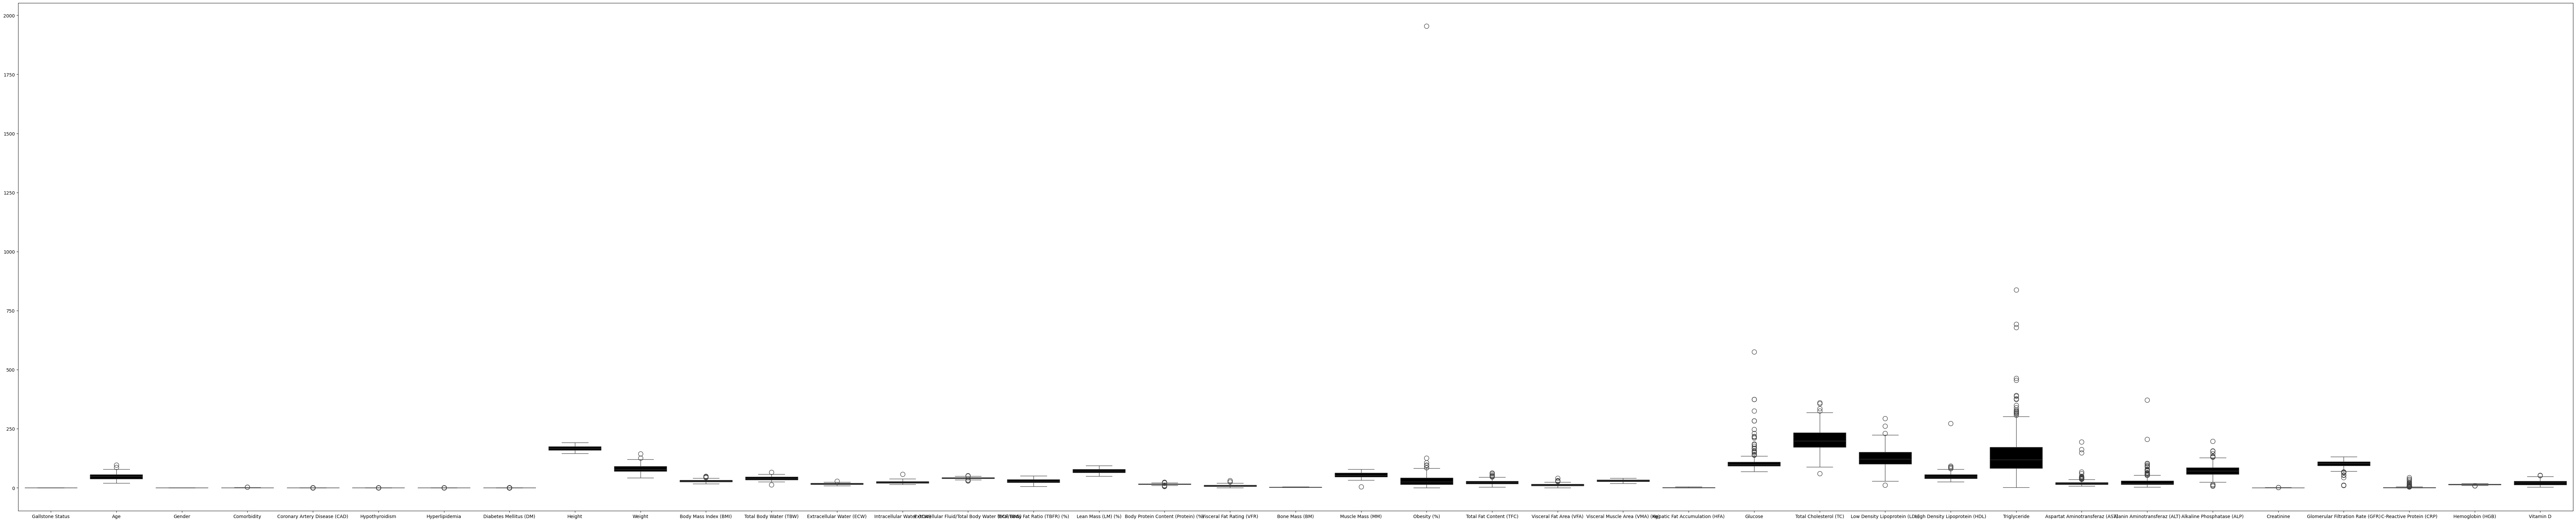

In [67]:
plt.figure(figsize=(100,20))
sns.boxplot(data=data, color='black', fliersize=10)

In [68]:
data['Obesity (%)'].describe()


count     319.000000
mean       35.850125
std       109.799718
min         0.400000
25%        13.900000
50%        25.600000
75%        41.750000
max      1954.000000
Name: Obesity (%), dtype: float64

In [69]:
data[data['Obesity (%)'] == data['Obesity (%)'].max()]
data['Obesity (%)'][239] = data['Obesity (%)'].quantile(0.95)
data['Obesity (%)'][239]

/var/folders/r6/5d6v8wt9607_klstd2c5wdv00000gn/T/ipykernel_97902/1017756667.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Obesity (%)'][239] = data['Obesity (%)'].quantile(0.95)
/var/folders/r6/5d6v8wt9607_klstd2c5wdv00000gn/T/ip

np.float64(72.05999999999997)

<Axes: >

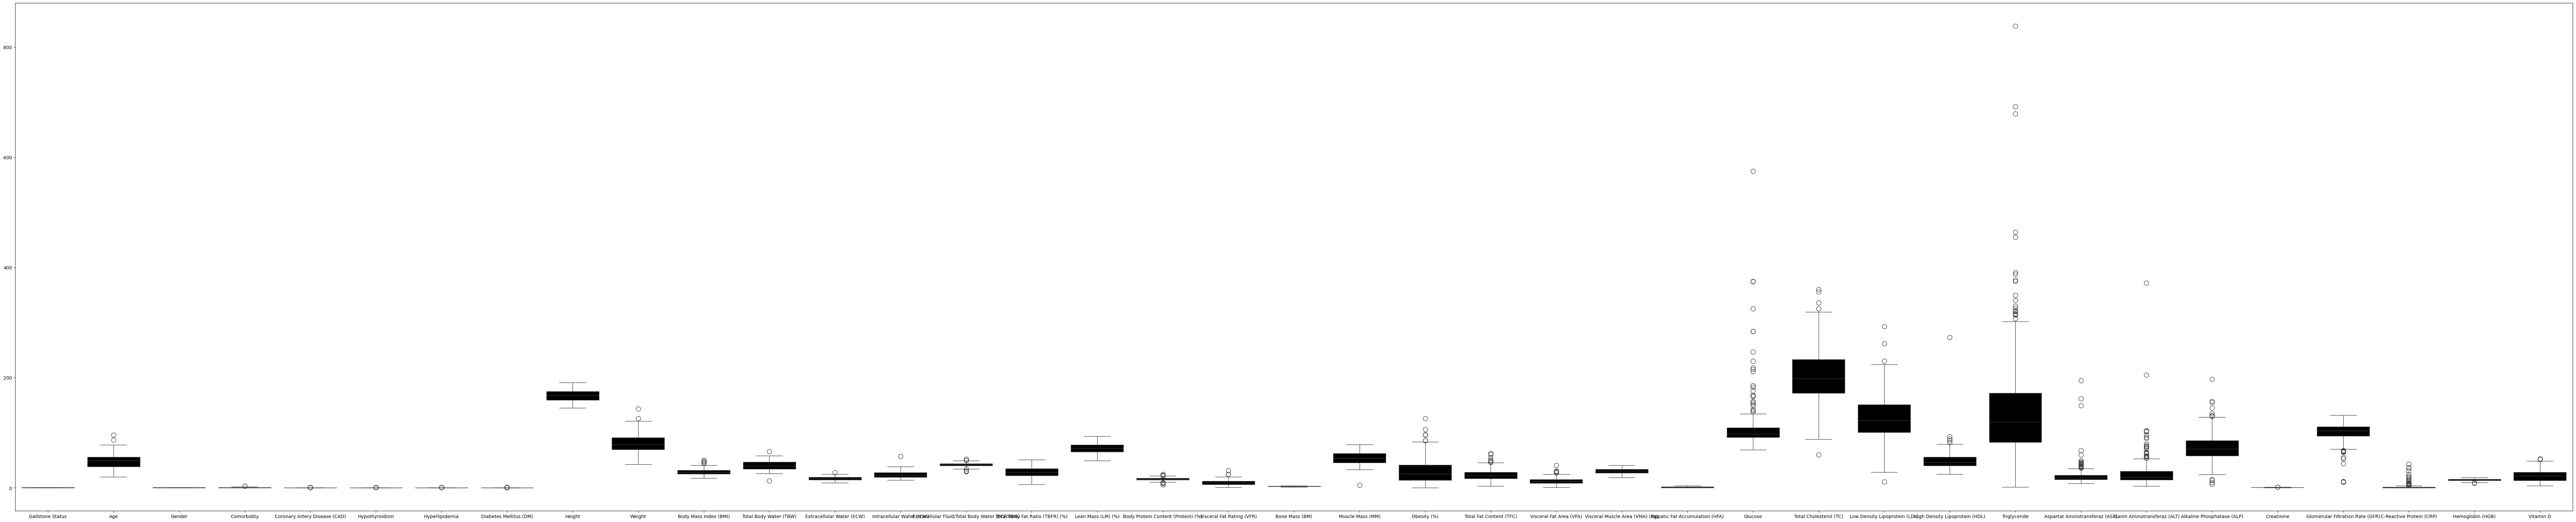

In [70]:
plt.figure(figsize=(100,20))
sns.boxplot(data=data, color='black', fliersize=10)

In [71]:
data.sort_values(by='Triglyceride', ascending=False)


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
242,1,47,1,1,0,0,0,1,173,87.8,...,33.0,838.00,14.0,16.0,64.0,0.90,79.300000,2.80,14.5,5.30
20,0,50,0,1,0,0,0,1,178,110.7,...,33.0,692.00,24.0,24.0,97.0,0.83,107.280000,0.10,17.9,11.10
8,0,38,0,0,0,0,0,0,186,93.7,...,33.0,679.00,68.0,102.0,70.0,0.91,110.630000,1.57,16.5,22.70
7,0,41,0,0,0,0,0,0,176,114.0,...,34.0,464.00,26.0,28.0,69.0,1.30,73.730000,0.11,16.5,24.50
50,0,38,0,1,0,0,0,1,167,82.2,...,30.0,455.00,32.0,34.0,88.0,0.95,110.430000,0.00,17.0,10.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1,34,1,0,0,0,0,0,163,79.3,...,67.0,34.00,14.0,13.0,45.0,0.46,132.000000,1.50,12.4,30.00
142,0,35,1,0,0,0,0,0,165,66.3,...,55.0,34.00,15.0,16.0,64.0,0.70,115.590000,0.00,11.9,26.90
164,1,31,1,0,0,0,0,0,160,48.9,...,68.0,23.00,16.0,13.0,54.0,0.59,95.693333,0.50,12.4,3.50
318,1,60,1,0,0,0,0,0,154,63.5,...,273.0,19.00,25.0,73.0,73.0,0.85,73.000000,0.00,13.6,29.00


In [72]:
tgy = data['Triglyceride'].quantile(0.95)
data.loc[data['Triglyceride']>tgy,'Triglyceride']=tgy
data.sort_values(by='Triglyceride', ascending=False)

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
242,1,47,1,1,0,0,0,1,173,87.8,...,33.0,316.40,14.0,16.0,64.0,0.90,79.300000,2.800,14.5,5.30
106,0,43,0,0,0,0,0,0,163,74.8,...,38.0,316.40,43.0,32.0,66.0,0.86,117.980000,0.315,14.4,33.00
20,0,50,0,1,0,0,0,1,178,110.7,...,33.0,316.40,24.0,24.0,97.0,0.83,107.280000,0.100,17.9,11.10
250,1,49,0,1,0,0,0,1,169,71.3,...,41.0,316.40,17.0,21.0,63.0,0.70,111.700000,0.200,17.0,12.20
285,1,50,0,0,0,0,0,0,180,88.7,...,35.0,316.40,18.0,42.0,95.0,0.87,105.100000,6.300,15.1,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1,34,1,0,0,0,0,0,163,79.3,...,67.0,34.00,14.0,13.0,45.0,0.46,132.000000,1.500,12.4,30.00
142,0,35,1,0,0,0,0,0,165,66.3,...,55.0,34.00,15.0,16.0,64.0,0.70,115.590000,0.000,11.9,26.90
164,1,31,1,0,0,0,0,0,160,48.9,...,68.0,23.00,16.0,13.0,54.0,0.59,95.693333,0.500,12.4,3.50
318,1,60,1,0,0,0,0,0,154,63.5,...,273.0,19.00,25.0,73.0,73.0,0.85,73.000000,0.000,13.6,29.00


<Axes: >

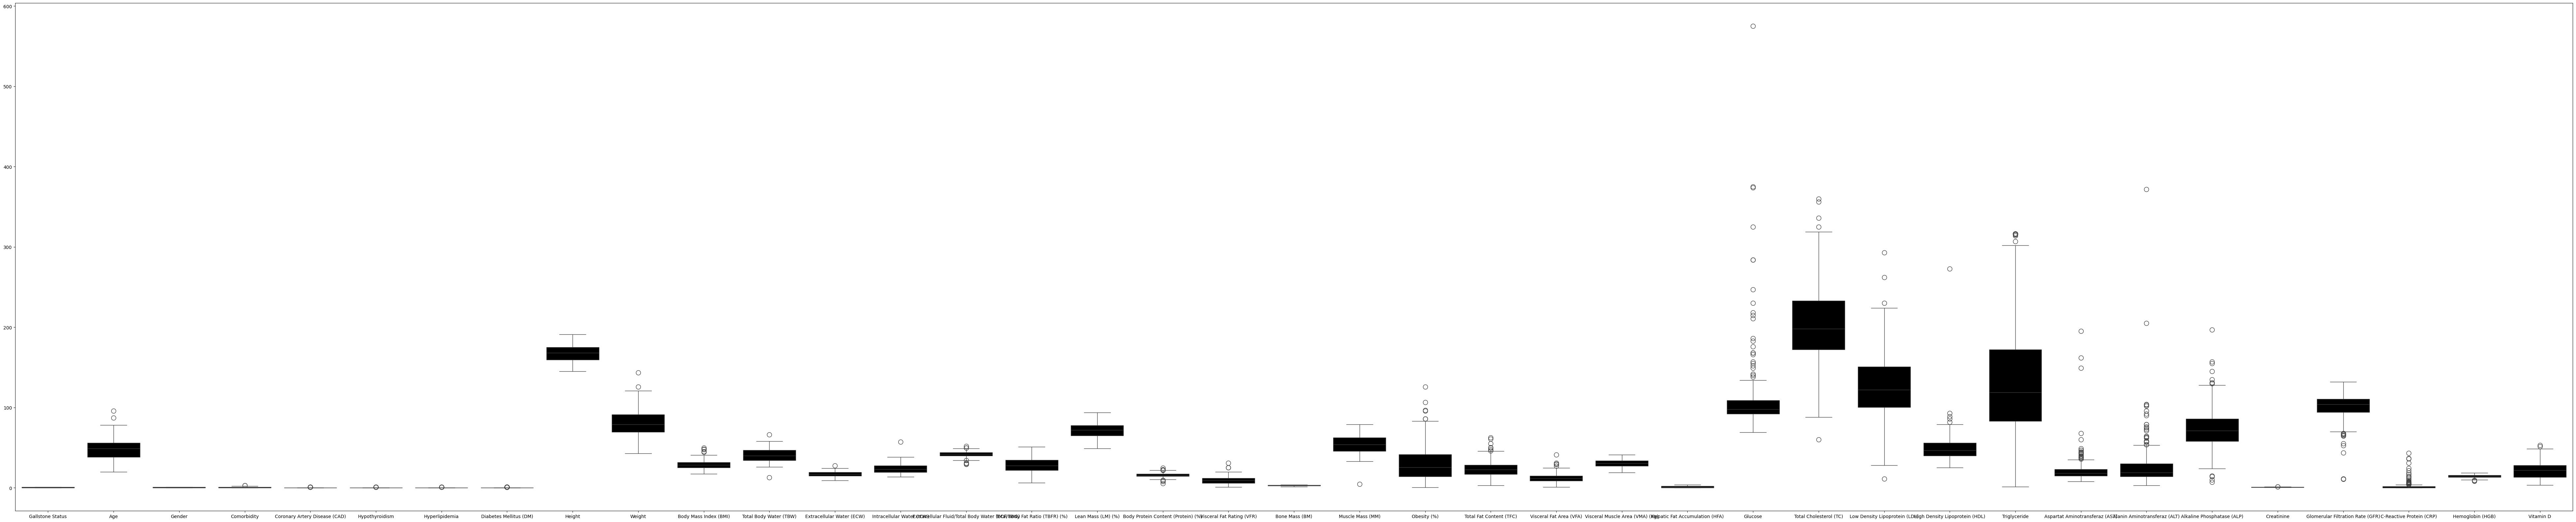

In [73]:
plt.figure(figsize=(100,20))
sns.boxplot(data=data, color='black', fliersize=10)

In [74]:
alt = data['Alanin Aminotransferaz (ALT)'].quantile(0.95)
data.loc[data['Alanin Aminotransferaz (ALT)']>alt,'Alanin Aminotransferaz (ALT)']=alt
data.sort_values(by='Alanin Aminotransferaz (ALT)', ascending=False)

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
159,0,65,0,1,0,0,0,1,168,65.9,...,38.0,164.0,30.0,64.0,86.0,0.99,84.54,0.10,15.5,19.200000
27,0,54,0,1,0,0,0,0,187,95.2,...,26.0,249.0,38.0,64.0,49.0,1.22,78.06,0.57,17.2,23.714286
278,1,44,0,0,0,0,0,0,175,93.1,...,40.0,104.0,195.0,64.0,145.0,0.81,111.50,1.30,15.4,7.800000
266,1,47,0,0,0,0,0,0,170,94.2,...,45.0,262.0,33.0,64.0,52.0,0.74,112.40,2.60,15.6,13.300000
223,1,34,0,0,0,0,0,0,181,110.1,...,26.0,148.0,45.0,64.0,73.0,0.93,110.00,0.60,15.6,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1,39,1,0,0,0,0,0,157,64.3,...,39.0,149.0,10.0,7.0,65.0,0.64,114.50,0.00,11.8,19.600000
88,0,44,1,0,0,0,0,0,165,73.0,...,64.0,101.0,11.0,7.0,53.0,0.61,112.99,0.26,12.9,28.333333
76,0,20,0,0,0,0,0,0,188,62.8,...,60.0,52.0,25.0,7.0,7.0,0.93,117.75,0.00,16.0,19.625000
137,0,56,1,0,0,0,0,0,165,70.4,...,72.0,105.0,17.0,4.0,59.0,0.59,105.50,0.50,13.5,42.000000


In [75]:
data['Glucose'].describe()

count    319.000000
mean     108.688715
std       44.848714
min       69.000000
25%       92.000000
50%       98.000000
75%      109.000000
max      575.000000
Name: Glucose, dtype: float64

In [76]:
glu = data['Glucose'].quantile(0.95)
data.loc[data['Glucose']>glu,'Glucose']=glu
data['Glucose'].sort_values(ascending=False)

79     168.0
81     168.0
20     168.0
242    168.0
239    168.0
       ...  
183     80.0
44      79.0
45      75.0
5       74.0
3       69.0
Name: Glucose, Length: 319, dtype: float64

<Axes: >

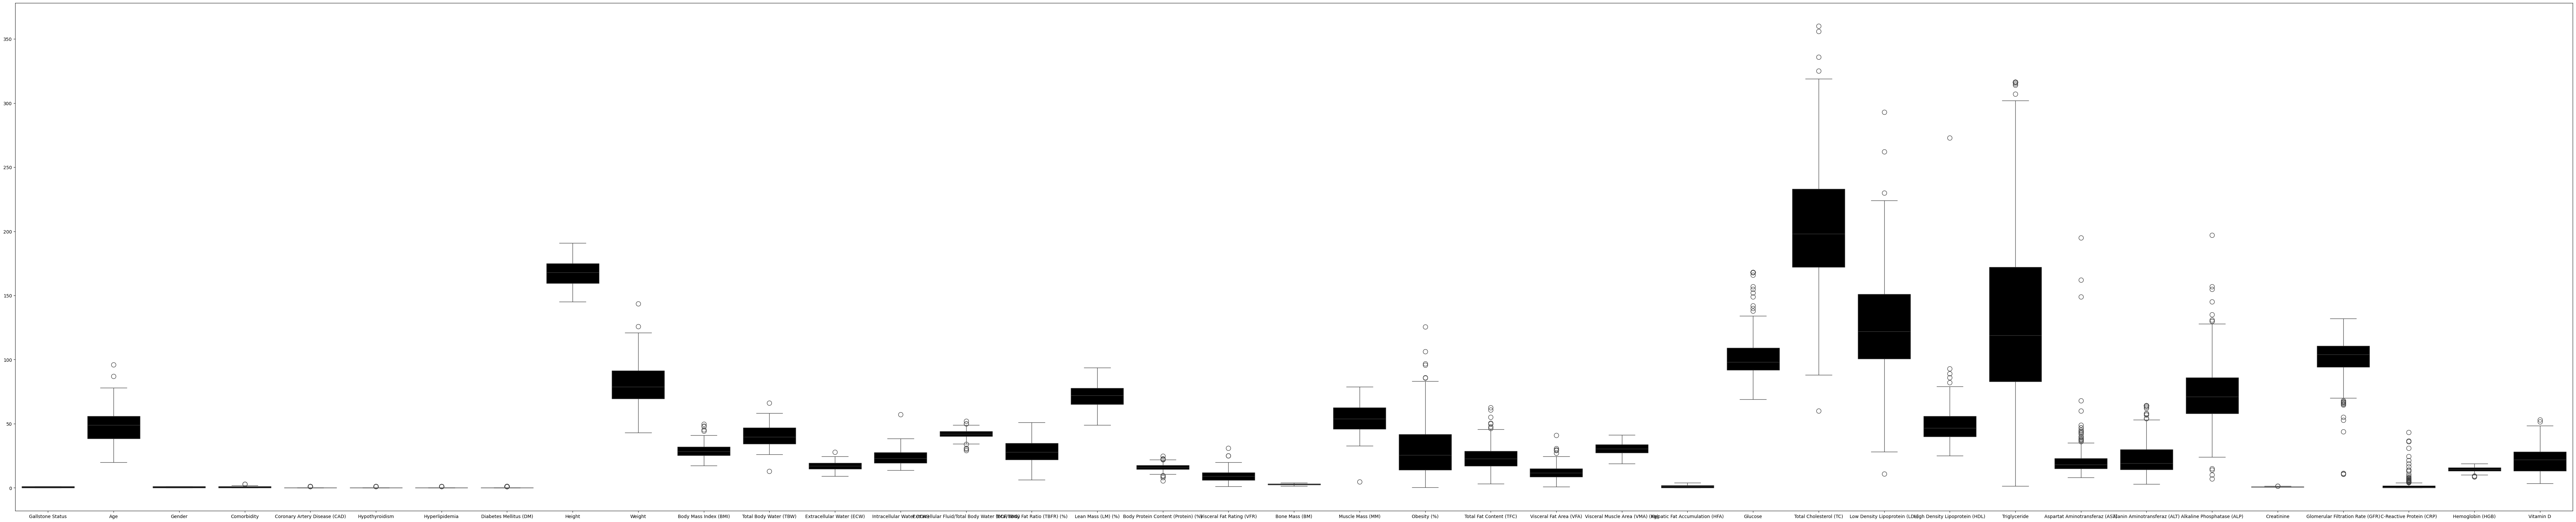

In [77]:
plt.figure(figsize=(100,20))
sns.boxplot(data=data, color='black', fliersize=10)

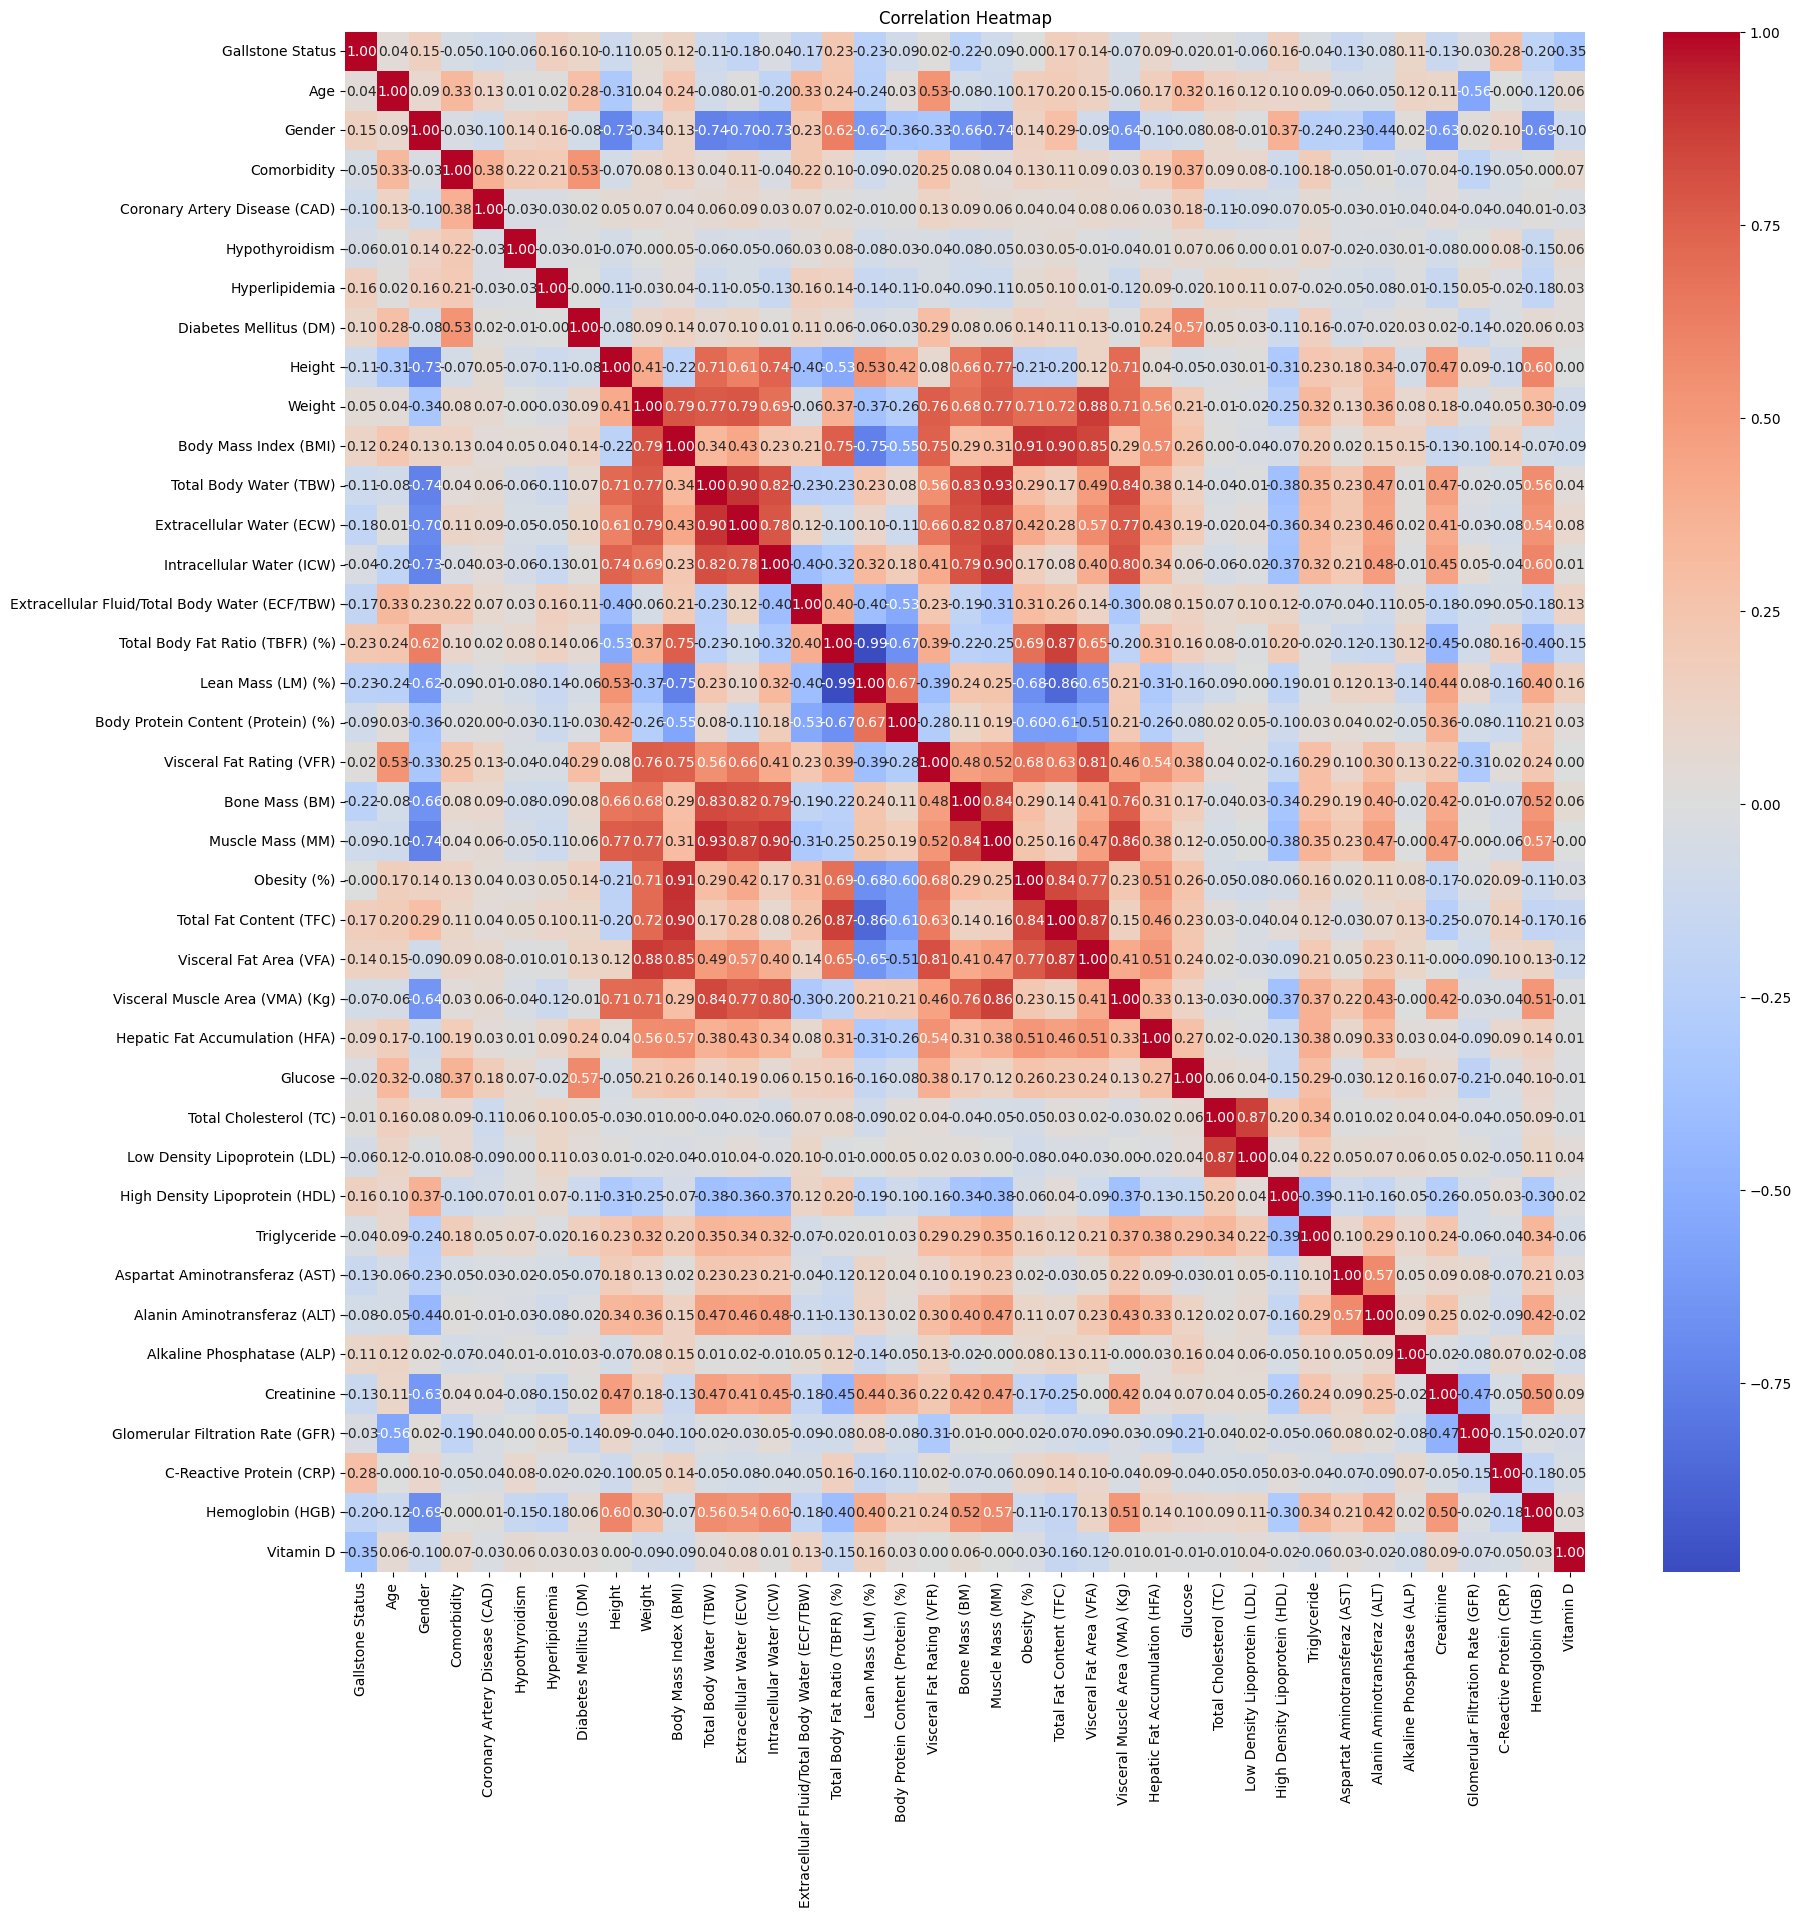

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Logistic Regression (Less Features)

In [79]:
X = data.drop('Gallstone Status',axis=1)
X = X.iloc[:,:7]
y = data['Gallstone Status']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [81]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
y_pred = lr_model.predict(X_test)

In [83]:
acc = accuracy_score(y_test,y_pred)
acc

0.5234375

<Axes: >

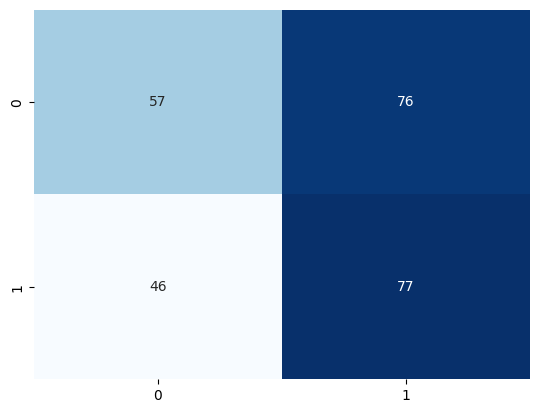

In [84]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.43      0.48       133
           1       0.50      0.63      0.56       123

    accuracy                           0.52       256
   macro avg       0.53      0.53      0.52       256
weighted avg       0.53      0.52      0.52       256



# Logistic Regression (Complete Features)

In [86]:
X = data.drop('Gallstone Status',axis=1)
y = data['Gallstone Status']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [88]:
# #Scaling Accuracy 0.68
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [89]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)

/Users/ayush1512/Documents/GitHub/Programming-HPC/ML/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
y_pred = lr_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [91]:
accuracy_score(y_test,y_pred)

0.765625

<Axes: >

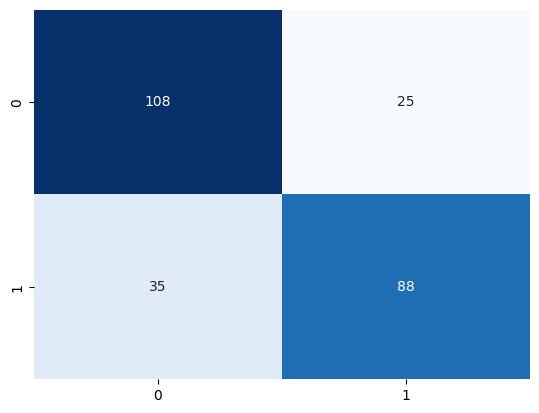

In [92]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       133
           1       0.78      0.72      0.75       123

    accuracy                           0.77       256
   macro avg       0.77      0.76      0.76       256
weighted avg       0.77      0.77      0.76       256



# RandomForest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
X = data.drop('Gallstone Status',axis=1)
y = data['Gallstone Status']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [97]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
re_model = RandomForestClassifier(n_estimators=100, random_state=42)
re_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [99]:
y_pred = re_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [100]:
accuracy_score(y_test,y_pred)

0.7109375

<Axes: >

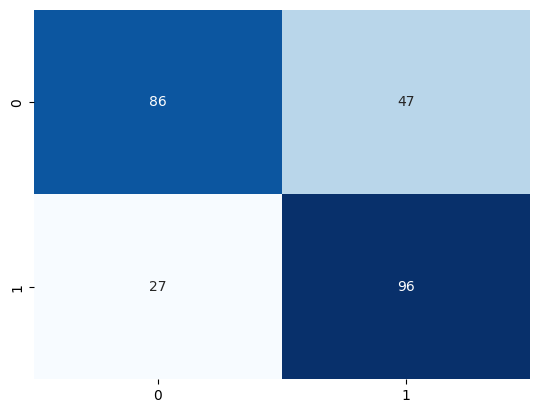

In [101]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       133
           1       0.67      0.78      0.72       123

    accuracy                           0.71       256
   macro avg       0.72      0.71      0.71       256
weighted avg       0.72      0.71      0.71       256



# Decision Trees

In [103]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [104]:
X = data.drop('Gallstone Status',axis=1)
y = data['Gallstone Status']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [106]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
base_tree = DecisionTreeClassifier(random_state=42)

In [108]:
bagging_model = BaggingClassifier(estimator=base_tree, n_estimators=50, max_samples=0.8,
                                  max_features=1.0, bootstrap=True, random_state=42)

In [109]:
bagging_model.fit(X_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [110]:
y_pred_bag = bagging_model.predict(X_test)
y_pred_bag

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [111]:
acc_bag = accuracy_score(y_test, y_pred_bag)
acc_bag

0.74609375

<Axes: >

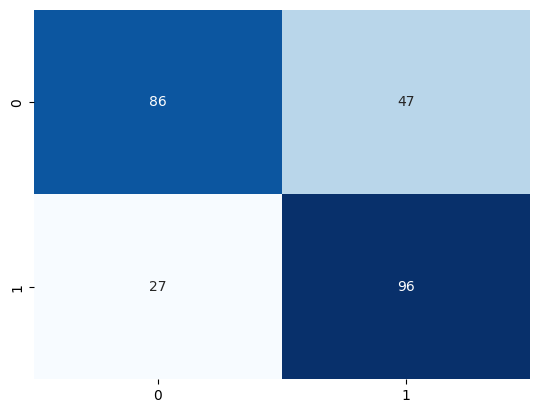

In [112]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [113]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       133
           1       0.75      0.71      0.73       123

    accuracy                           0.75       256
   macro avg       0.75      0.74      0.74       256
weighted avg       0.75      0.75      0.75       256



# XGBoost

In [114]:
from xgboost import XGBClassifier

In [115]:
X = data.drop('Gallstone Status',axis=1)
y = data['Gallstone Status']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [117]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [119]:
y_pred = xgb_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [120]:
acc = accuracy_score(y_test, y_pred)
acc

0.7265625

<Axes: >

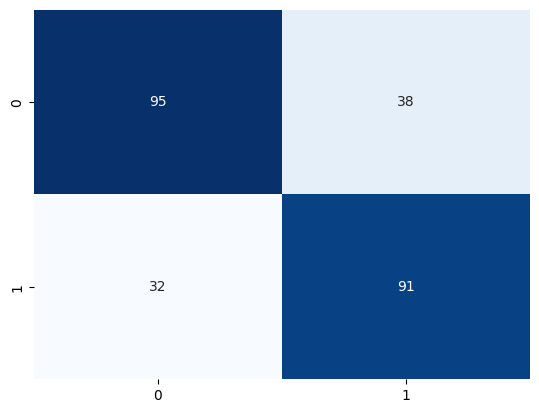

In [121]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       133
           1       0.71      0.74      0.72       123

    accuracy                           0.73       256
   macro avg       0.73      0.73      0.73       256
weighted avg       0.73      0.73      0.73       256

